<a href="https://colab.research.google.com/github/Anu1996rag/Neural_Networks/blob/master/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### This file demonstrates the various methods of tensorflow and keras 
#### using Simple Linear Regression
 
 Reference : https://www.tensorflow.org/tutorials/keras/regression


In [ ]:
#importing relevant libraries 

# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [ ]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


In [ ]:
#for graphical representation 
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
# getting the data 

dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [ ]:
#importing using pandas
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


##### Cleaning the data

In [ ]:
# checking out the null values 
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
#dropping out the null values
dataset = dataset.dropna()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [ ]:
#converting the Origin column into one hot encoding
dataset['Origin'] = dataset['Origin'].map({1:'USA',2:'Europe',3:'Japan'})
dataset = pd.get_dummies(dataset,prefix='', prefix_sep='')


In [ ]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


##### Splitting the data into train and test

In [ ]:
X_train = dataset.sample(frac=0.8,random_state=0)
X_test = dataset.drop(X_train.index)

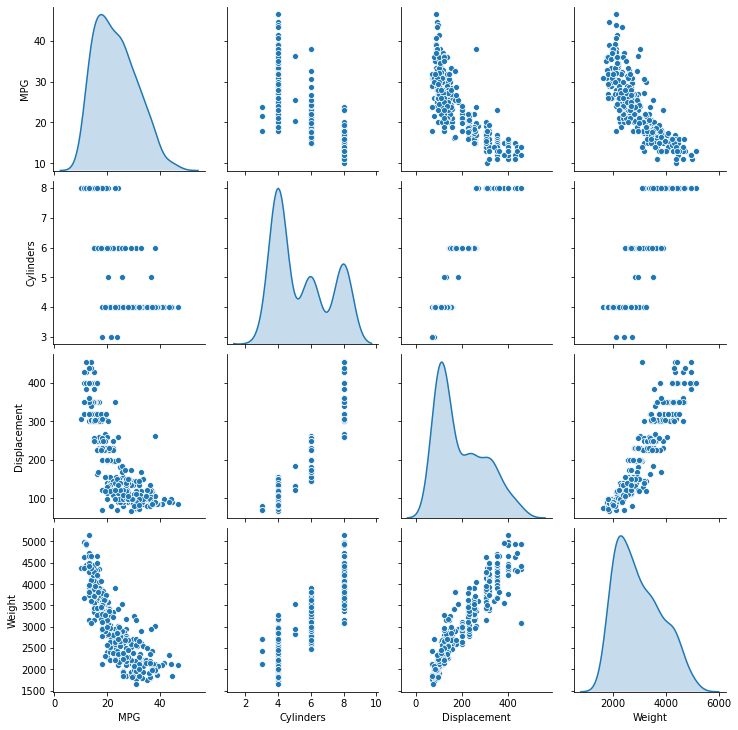

In [ ]:
#checking out the relationship between the variables 
sns.pairplot(X_train[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

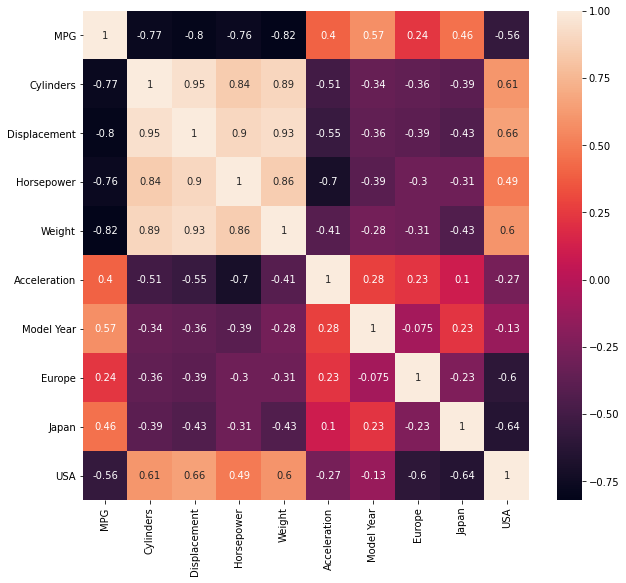

In [ ]:
# looking at how variables are correlated
plt.figure(figsize=(10,9)) 
sns.heatmap(X_train.corr(),annot=True,cbar=True)

In [ ]:
# looking at the overall statistics
trainData_stats = X_train.describe()

In [ ]:
trainData_stats.pop('MPG')


count    314.000000
mean      23.310510
std        7.728652
min       10.000000
25%       17.000000
50%       22.000000
75%       28.950000
max       46.600000
Name: MPG, dtype: float64

In [ ]:
trainData_stats = trainData_stats.transpose()

In [ ]:
# splitting the test dataset
y_train = X_train.pop('MPG')
y_test = X_test.pop('MPG')

##### Normalizing the dataset before training 

In [ ]:
def normalize(x):
  return (x - trainData_stats['mean'])/trainData_stats['std']

In [ ]:
X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)

#### Building the model

In [ ]:
def build_model():
  model = keras.Sequential([
                            layers.Dense(64,activation='relu',input_shape=[len(X_train.keys())]),
                            layers.Dense(64,activation='relu'),
                            layers.Dense(1)
                          ])
  
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss = 'mse',
                optimizer= optimizer,
                metrics = ['mae' ,'mse'])
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


#### Plotting the model


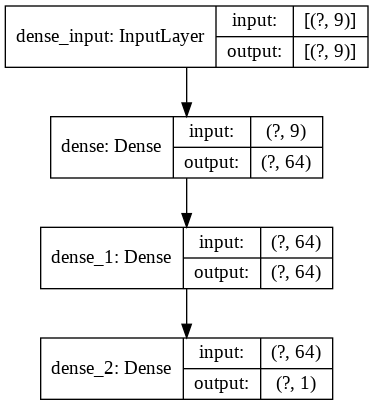

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### Training the model

In [ ]:
example_batch = X_train_normalized[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.20685275],
       [ 0.02333814],
       [ 0.38183808],
       [-0.04354371],
       [-0.02159134],
       [-0.11958629],
       [-0.0377402 ],
       [ 0.17065294],
       [-0.05860104],
       [ 0.34099957]], dtype=float32)

In [ ]:
EPOCHS = 1000

history = model.fit(X_train_normalized,y_train,
                    epochs=EPOCHS,validation_split=0.2,
                    callbacks=[tfdocs.modeling.EpochDots()],
                    verbose=1)

Epoch 1/1000
1/8 [==>...........................] - ETA: 0s - loss: 538.4277 - mae: 21.9819 - mse: 538.4277
Epoch: 0, loss:559.7556,  mae:22.3723,  mse:559.7556,  val_loss:548.2928,  val_mae:22.1053,  val_mse:548.2928,  
8/8 [==============================] - 0s 23ms/step - loss: 559.7556 - mae: 22.3723 - mse: 559.7556 - val_loss: 548.2928 - val_mae: 22.1053 - val_mse: 548.2928
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 508.0451 - mae: 21.2240 - mse: 508.0451 - val_loss: 492.9645 - val_mae: 20.8606 - val_mse: 492.9645
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 455.0805 - mae: 19.9907 - mse: 455.0805 - val_loss: 431.9503 - val_mae: 19.3954 - val_mse: 431.9503
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 397.2028 - mae: 18.5325 - mse: 397.2028 - val_loss: 367.1542 - val_mae: 17.7116 - val_mse: 367.1542
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 334.8151 - mae: 16.8549 - mse: 

In [ ]:
#Visualize the model's training progress using the stats stored in the history object
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.310422,0.953696,2.310422,9.317501,2.325108,9.317501,995
996,2.299813,0.955229,2.299813,8.991309,2.318531,8.991309,996
997,2.237207,0.955413,2.237207,9.082575,2.298381,9.082575,997
998,2.467004,0.997972,2.467004,9.201336,2.374749,9.201336,998
999,2.324528,0.975277,2.324528,9.306883,2.338894,9.306883,999


#### Plotting the learning curves


Text(0, 0.5, 'MAE[MPG]')

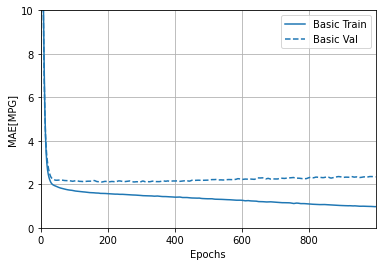

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic':history},metric='mae')
plt.ylim(0,10)
plt.ylabel('MAE[MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

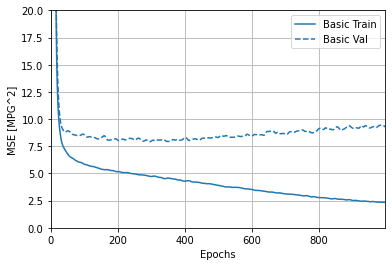

In [ ]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

#### Early Stopping 

In [ ]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

early_history = model.fit(X_train_normalized,y_train,
                    epochs=EPOCHS,validation_split=0.2,
                    callbacks=[early_stop,tfdocs.modeling.EpochDots()],verbose=1)

Epoch 1/1000
1/8 [==>...........................] - ETA: 0s - loss: 618.6676 - mae: 23.5965 - mse: 618.6676
Epoch: 0, loss:556.0525,  mae:22.2668,  mse:556.0525,  val_loss:545.7856,  val_mae:21.9789,  val_mse:545.7856,  
8/8 [==============================] - 0s 21ms/step - loss: 556.0525 - mae: 22.2668 - mse: 556.0525 - val_loss: 545.7856 - val_mae: 21.9789 - val_mse: 545.7856
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 502.2495 - mae: 20.9979 - mse: 502.2495 - val_loss: 487.4437 - val_mae: 20.6028 - val_mse: 487.4437
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 445.2606 - mae: 19.6176 - mse: 445.2606 - val_loss: 421.4657 - val_mae: 18.9756 - val_mse: 421.4657
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 382.7549 - mae: 18.0244 - mse: 382.7549 - val_loss: 351.8452 - val_mae: 17.1234 - val_mse: 351.8452
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 320.1055 - mae: 16.2580 - mse: 

Text(0, 0.5, 'MAE [MPG]')

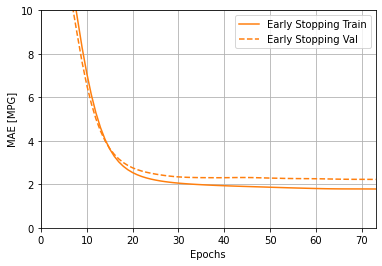

In [ ]:
#plotting the learning curves 
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [ ]:
# checking the generalization of the model 
loss, mae, mse = model.evaluate(X_test_normalized, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 6.1436 - mae: 1.9936 - mse: 6.1436
Testing set Mean Abs Error:  1.99 MPG


#### Making Predictions 

In [ ]:
predictions = model.predict(X_test_normalized).flatten()
predictions

array([16.3956   , 10.9223   , 12.332636 , 23.326122 , 22.62707  ,
       13.43728  , 13.383621 , 13.419875 , 20.533447 , 30.031199 ,
       25.602055 , 23.855768 , 14.931344 , 27.396425 , 13.03117  ,
       14.411543 , 14.8256645, 13.7521515, 19.396988 , 13.227188 ,
       14.56183  , 26.656172 , 20.267214 , 21.335312 , 30.697859 ,
       24.936626 , 16.740047 , 23.385006 , 17.631453 , 19.392254 ,
       28.735987 , 21.810595 , 19.32025  , 21.332169 , 27.489557 ,
       15.977094 , 19.605787 , 32.423435 , 31.059305 , 18.156855 ,
       31.683783 , 29.808893 , 16.164999 , 37.747326 , 36.078846 ,
       36.588467 , 20.742262 , 22.86085  , 20.787298 , 26.501413 ,
       31.999304 , 17.968836 , 32.98675  , 18.878475 , 17.851923 ,
       17.95453  , 34.68595  , 35.61314  , 22.656446 , 25.66856  ,
       40.320534 , 34.005215 , 28.403162 , 28.796415 , 33.30103  ,
       40.641087 , 37.71469  , 36.299957 , 34.623184 , 30.992533 ,
       23.060001 , 23.002102 , 30.624777 , 31.429987 , 37.1926

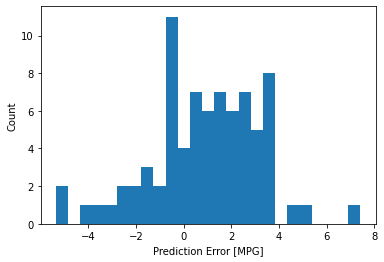

In [ ]:
## Error distribution
error = predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")